Importação das Lib's

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

Classe de despesas

In [3]:
class Despesas:
    def __init__(self, dicionario, cor, nome):
        self.dicionario = dicionario
        self.cor = cor
        self.nome = nome


Entrada dos dados para os graficos


In [4]:
AL = Despesas({1: 100, 2: 0, 3: 0, 4: 150, 5: 0}, 'lightblue', 'Alimentação')
VE = Despesas({1: 0, 2: 30, 3: 50, 4: 0, 5: 40}, 'red', 'Vestuário')
TR = Despesas({1: 0, 2: 0, 3: 100, 4: 300, 5: 50}, 'yellowgreen', 'Transporte')
listas_de_despesas = [AL,VE,TR]

Classe dos graficos

In [32]:
class Grafico:
    def __init__(self, listas_de_despesas):
        self.listas_de_despesas = listas_de_despesas
        self.Grafico()

    # GRAFICO 1
    def Grafico(self):
        self.editsGraficos()
        for gasto in self.listas_de_despesas:
            minhaLista = gasto.dicionario.items()
            cor = gasto.cor
            nome = gasto.nome
            x, y = zip(*minhaLista)
            plt.plot(x, y, label=nome, marker='o',
                     markerfacecolor='blue',
                     markersize=12,
                     color=cor,
                     linewidth=4)
        plt.legend()
        plt.show()

    # REGRESSAO LINEAR
    def reg_linear(self, id_grafico):
        gasto = self.listas_de_despesas[id_grafico]
        minhaLista = gasto.dicionario.items()
        cor = gasto.cor
        nome = gasto.nome
        AL, valores = zip(*minhaLista)
        AL = np.array(AL)
        valores = np.array(valores)
        AL = AL.reshape(-1, 1)
        valores = valores.reshape(-1, 1)
        regr = LinearRegression()
        regr.fit(X=AL, y=valores)
        plt.plot(AL, regr.predict(AL),
                 color='blue',
                 label='Regressão Linear')
        x, y = zip(*minhaLista)
        plt.plot(x, y, label = nome+str(" - original"),
                 marker='o',
                 markerfacecolor='olive',
                 markersize=12,
                 color=cor,
                 linewidth=4)
        plt.legend()
        plt.show()

    def editsGraficos(self):
        plt.title('Gráficos de Despesas')
        plt.xlabel('Dia')
        plt.ylabel('Despesas em R$')

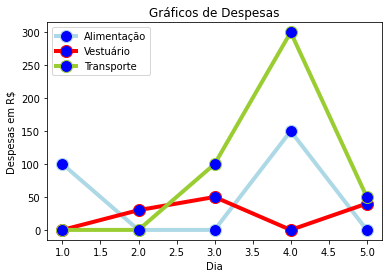

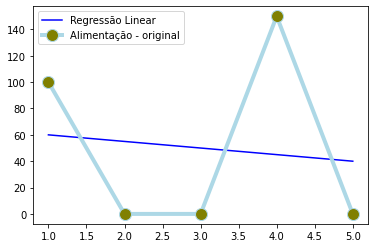

In [33]:
grafico = Grafico(listas_de_despesas)
print()
id_mes = 0 #alimentação          # 1 = vestuario       2 = transporte
grafico.reg_linear(id_mes)